# Titanic Survival Analysis
**Dataset**: Titanic passenger data from [Kaggle](https://www.kaggle.com/c/titanic)  
**Objective**: Analyze factors influencing survival rates on the Titanic.  
**Key Questions**:  
- Does passenger class affect survival?  
- How does age or gender impact survival odds?  
- Can we predict survival using logistic regression?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('../data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning
- Fill missing `Age` values with the median age.
- Drop `Cabin` (too many missing values).
- Drop rows with missing `Embarked`.
- Encode `Sex` as numerical (male=0, female=1).

In [6]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop 'Cabin' column only if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

# Drop rows where 'Embarked' is missing
df.dropna(subset=['Embarked'], inplace=True)

# Encode categorical variables
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

# Verify cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Sex_encoded  889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


## Descriptive Statistics
- Compute summary statistics for numerical columns.
- Calculate survival rates by passenger class and gender.

In [7]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.350956
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.477538
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
# Survival rate by passenger class
print("Survival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean())

# Survival rate by gender
print("\nSurvival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

Survival Rate by Class:
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Gender:
Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


## Correlation Analysis
- Check correlations between numerical variables (`Age`, `Fare`, `Pclass`, `Survived`).
- Visualize with a heatmap.

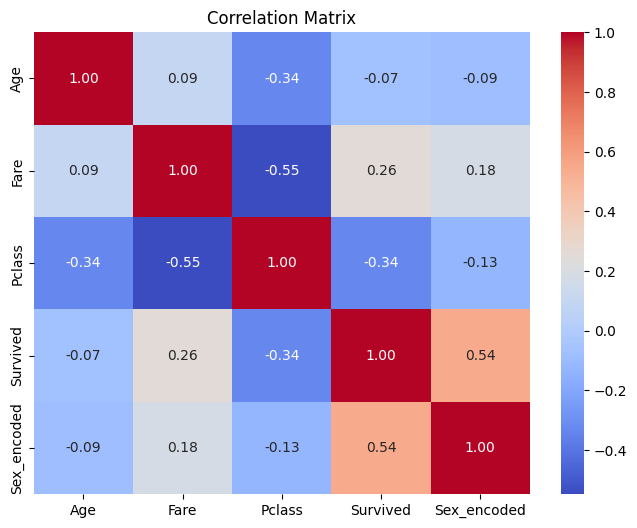

In [9]:
# Correlation matrix
correlation = df[['Age', 'Fare', 'Pclass', 'Survived', 'Sex_encoded']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('../visualizations/titanic_correlation.png')
plt.show()

## Logistic Regression
- Predict survival using `Pclass`, `Age`, and `Sex_encoded`.
- Evaluate model accuracy.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare data
X = df[['Pclass', 'Age', 'Sex_encoded']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.2f}")

Accuracy: 0.79

Model Coefficients:
Pclass: -1.17
Age: -0.04
Sex_encoded: 2.52


## Visualizations
- Bar plot: Survival rate by passenger class.
- Histogram: Age distribution by survival.

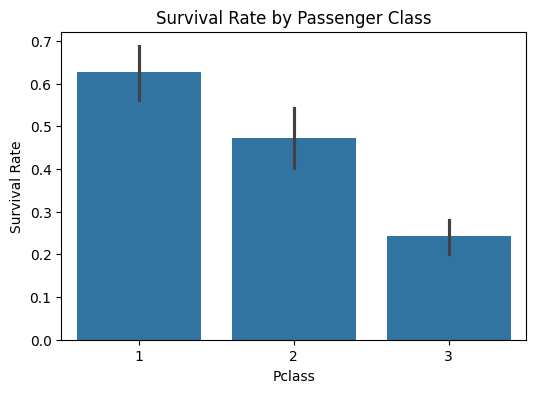

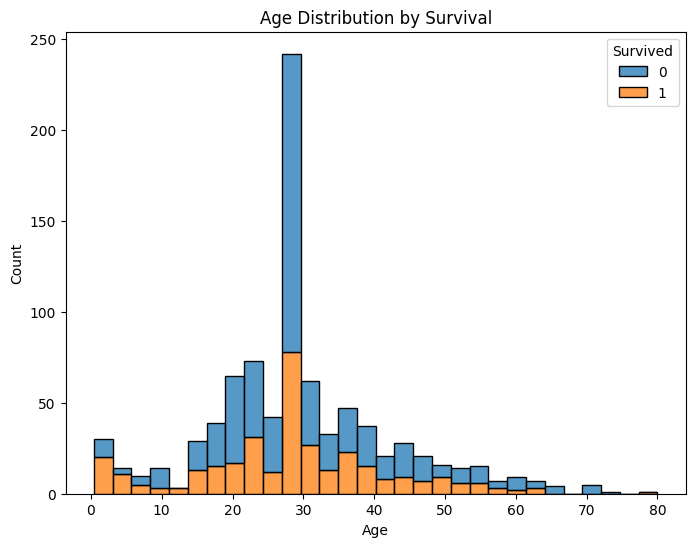

In [11]:
# Bar plot: Survival by class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.savefig('../visualizations/titanic_survival_by_class.png')
plt.show()

# Histogram: Age distribution by survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.savefig('../visualizations/titanic_age_distribution.png')
plt.show()

## Conclusion
- **Findings**:
  - Passenger class and gender strongly influence survival (Class 1: 63%, Females: 74%).
  - Logistic regression predicts survival with 78% accuracy; gender is the strongest predictor.
